# Synchronization

## Equation
We have a logistic map:
$$
f \left( x \right) = \mu \cdot x \cdot \left( 1 - x \right) 
$$
We have cycle with order 2, when the equation
$$
x = \mu^2 \cdot x \cdot \left( 1 - x \right)\cdot \left [1 - \mu \cdot x \cdot \left( 1 - x \right) \right]
$$
has two solutions
$$
\begin{cases}
x_2 = \mu \cdot x_1 \cdot \left( 1 - x_2 \right)\\
x_1 = \mu \cdot x_2 \cdot \left( 1 - x_1 \right)
\end{cases}
$$

This means that either
$$
\begin{cases}
x_1 + x_2 = \frac{1 + \mu}{\mu} \\
x_1 \cdot x_2 = \frac{1 + \mu}{\mu^2}
\end{cases}
$$
Solutions are
$$
x_{1, 2} = \frac{1 + \mu \pm \sqrt{\left(1 + \mu \right) \cdot \left(\mu -3 \right)}}{2 \cdot \mu}
$$

The cycle with order 2 is real when $\mu>3$.

Finding the upper bound
$$
\left(f \left(f \left( x_1 \right)\right)\right)' = \mu^2 \cdot \left(1 - 2 \cdot \left( x_1 + x_2 \right) + 4 \cdot x_1 \cdot x_2 \right)
= - \mu^2 + 2 \cdot \mu + 4 
$$
Solutions are
$$
\mu_{1, 2} = 1 \pm \sqrt{6}
$$
\mu_{1, 2} = 1 - \sqrt{6} \le 0
$$
So
$$
3 \le \mu \le 3.45

We have a system
$$
\begin{cases}
U_{n+1}  = \frac{f \left(U_n + V_n \right) + f \left(U_n - V_n \right)}{2} \\
V_{n+1} = \left(\frac{1}{2} - \varepsilon \right) \cdot \left[f \left(U_n + V_n \right) - f \left(U_n - V_n \right) \right]
\end{cases}
$$
There are $V_0=0$. Then
$$
V_{n+1} = \left(\frac{1}{2} - \varepsilon \right) \cdot \left[f \left(U_n \right) - f \left(U_n  \right) \right] = 0
$$
That's mean $V_0 = 0$ - fixed point. 
$$
U_{n+1}  = f \left(U_n\right) 
$$


## Critical values

$$
U_crit = \frac{\mu \cdot U_0^2}{- \mu + 1 + 2 \cdot \mu \cdot U_0}
$$

$$
\varepsilon_{crit} = \frac{1}{- 2 \cdot \mu \cdot \left( 1 - 2 \cdot U_0 \right)}+ \frac{1}{2}
$$

If $V_n \ge 0$, then $\varepsilon_{crit}$ - lower bound

If $V_n \le 0$, then $\varepsilon_{crit}$ - upper bound



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
n = 1000
mu = 3.8
x0s = [0.15, 0.35, 0.65, 0.85]
def f(x):
    return mu * x * (1 - x)

def make_seq(x0):
    seq = [x0]
    x_curr = x0
    for i in range(n):
        x_next = f(x_curr)
        seq.append(x_next)
    x_curr = x_next
    return seq

def make_xy_item(x, y, e):
    x_next = f(x) - e * (f(x) - f(y))
    y_next = f(y) + e * (f(x) - f(y))
    return x_next, y_next
def make_xy_system(x0, y0, e):
    xs = []
    ys = []
    x_c, y_c = x0, y0
    for i in range(n):
        x_n, y_n = make_xy_item(x_c, y_c, e)
        xs.append(x_n)
        ys.append(y_n)
        x_c = x_n
        y_c = y_n
    return xs, ys

def make_transition_from(xs, ys):
    us = []
    vs = []
    for x, y in zip(xs, ys):
        u = (x + y) / 2
        v = (x - y) / 2
        us.append(u)
        vs.append(v)
    return us, vs

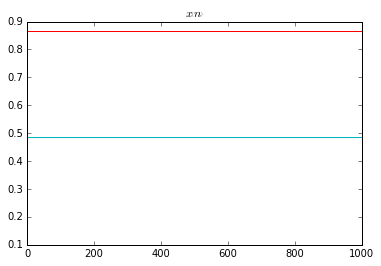

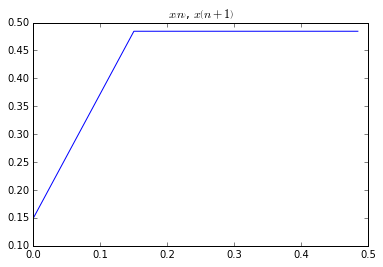

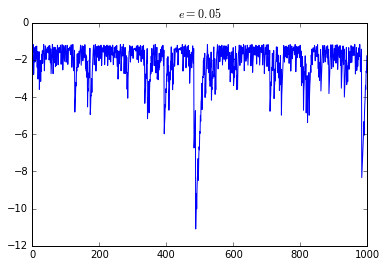

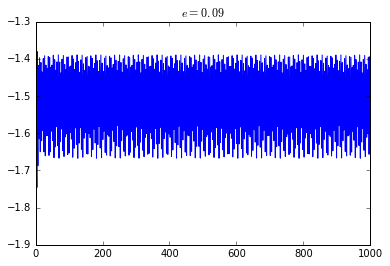

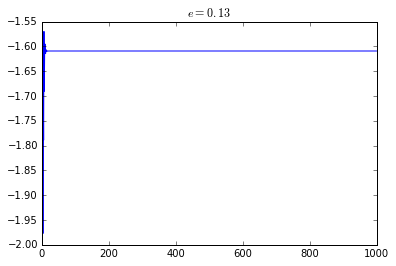

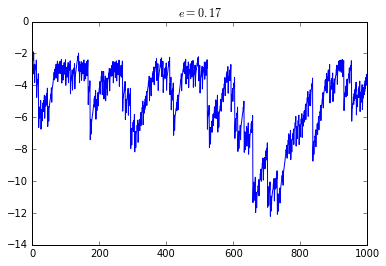

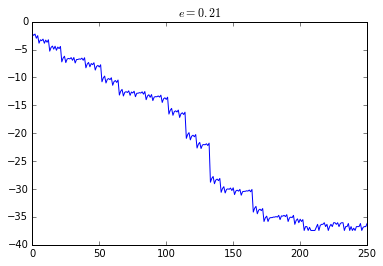

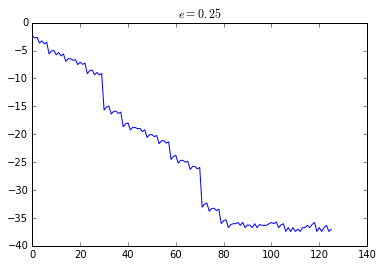

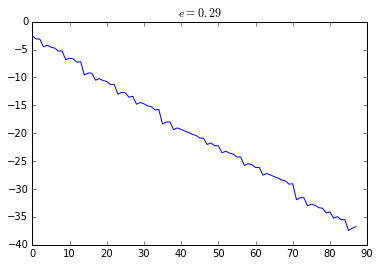

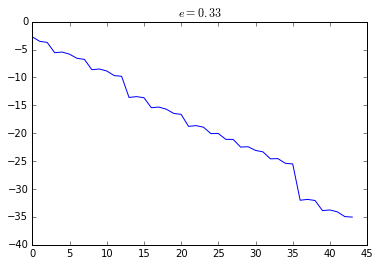

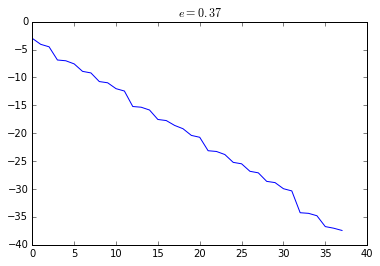

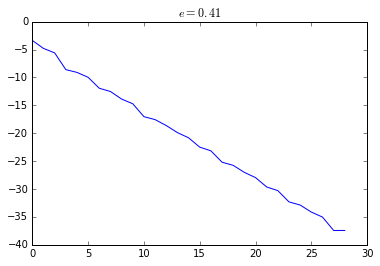

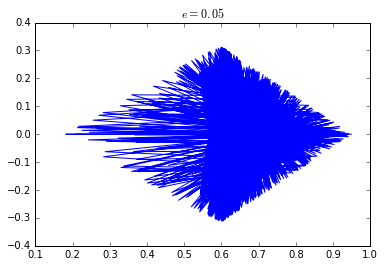

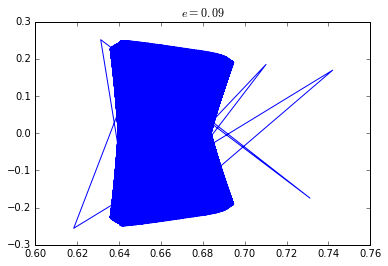

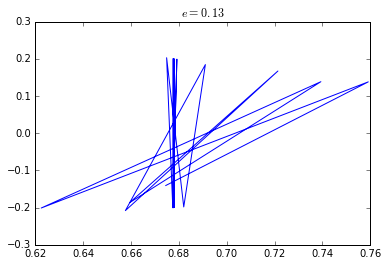

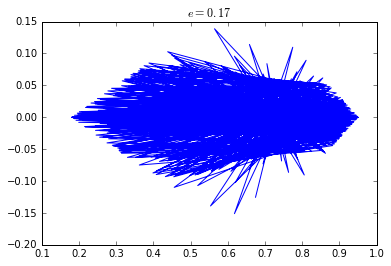

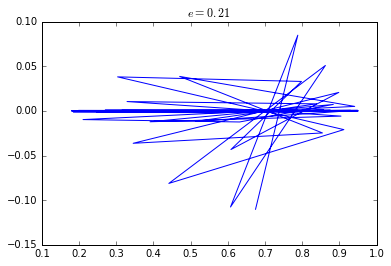

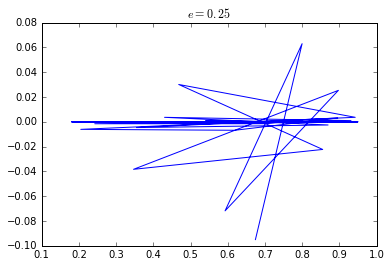

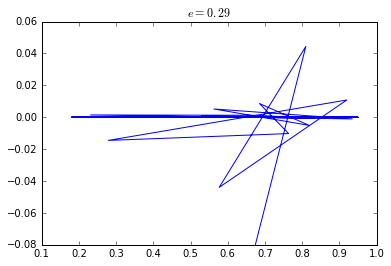

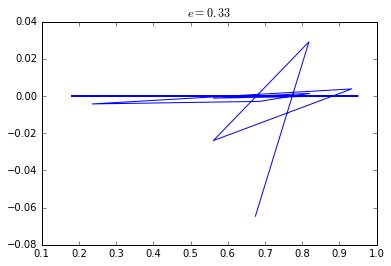

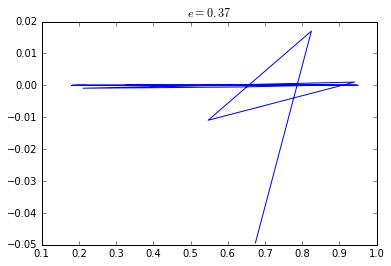

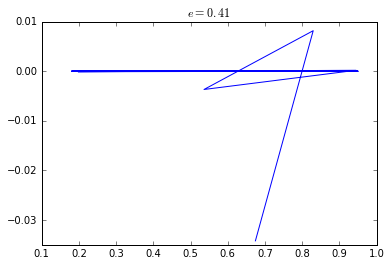

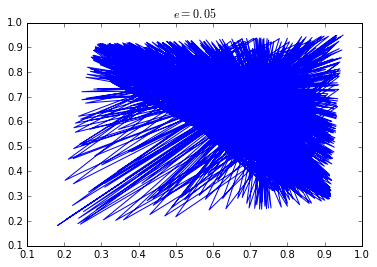

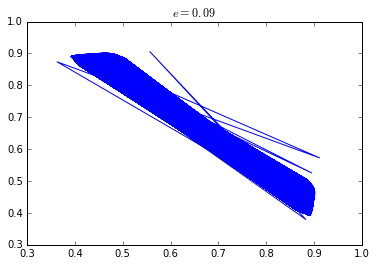

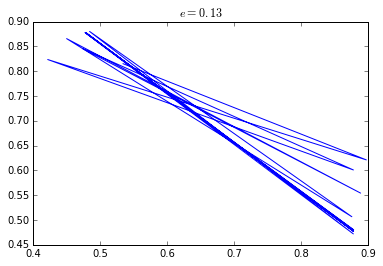

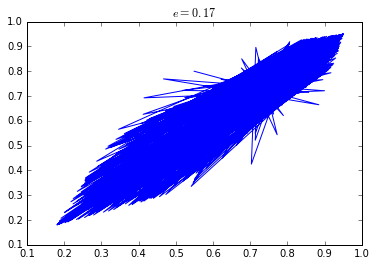

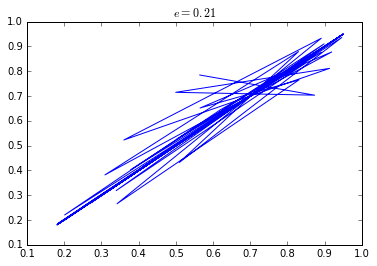

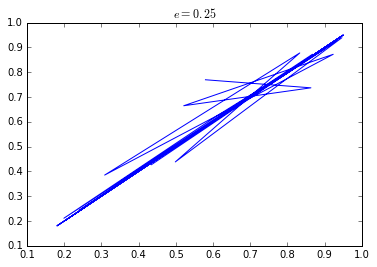

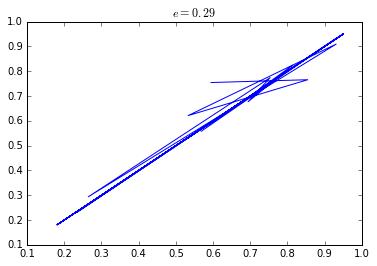

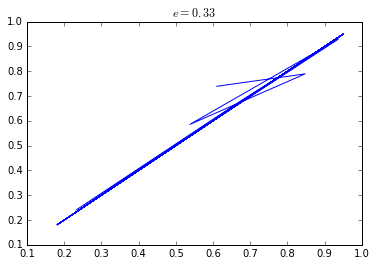

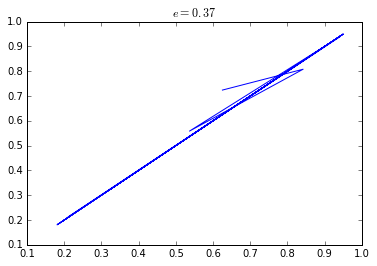

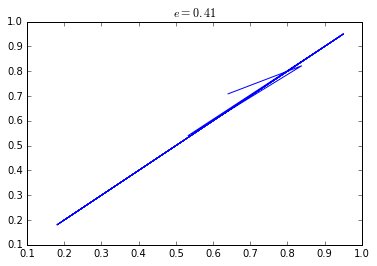

In [3]:
seqs = []
for x0 in x0s:
    seqs.append(make_seq(x0))
for seq in seqs:
    plt.title(r'$x\left( n \right)$')
    plt.plot(range(len(seq)), seq)
plt.show()

seq = seqs[0]
seq_shifted = seq[:]
seq_shifted.insert(0, 0)
seq_shifted.pop(-1)

plt.title(r'$x\left( n \right)$, $x\left( n+1 \right)$')
plt.plot(seq_shifted, seq)
plt.show()

es = [i for i in np.arange(0.05, 0.45, 0.04)]
x0, y0 = x0s[0], x0s[1]

xy_seqs = []
for e in es:
    item = (make_xy_system(x0, y0, e), e)
    xy_seqs.append(item)

uv_seqs = []
for seq in xy_seqs:
    uv_seqs.append((make_transition_from(*seq[0]), seq[1]))

for uv_seq in uv_seqs:
    ## only != 0
    vn = list(filter(lambda x: x != 0, uv_seq[0][1]))
    plt.title('$e=%s$' % uv_seq[1])
    plt.plot(range(len(vn)), [np.log(np.abs(item)) for item in vn])
    plt.show()

for uv_seq in uv_seqs:
    plt.title('$e=%s$' % uv_seq[1])
    plt.plot(uv_seq[0][0], uv_seq[0][1])
    plt.show()

for xy_seq in xy_seqs:
    plt.title('$e=%s$' % xy_seq[1])
    plt.plot(xy_seq[0][0], xy_seq[0][1])
    plt.show()